<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema_03/03_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 11: Introducción a las redes neuronales

## Tema 3: Redes convolucionales


El objetivo de esta libreta es entrenar una red convolucional para clasificar imágenes del conjunto de datos [fashion_mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist)


Algunas notas del conjunto de fashion_mnist:

* Contiene 70,000 imágenes (igual que MNIST).
* Las imágenes son en blanco y negro.
* El tamaño de cada imagen es de 28x28.
* Es un conjunto de datos etiquetado

In [ ]:
#https://ai.stanford.edu/%7Ejkrause/cars/car_dataset.html
#!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
#! tar -xzf cars_train.tgz
#!wget https://ai.stanford.edu/%7Ejkrause/cars/car_devkit.tgz
#!tar -xzf car_devkit.tgz

#Asegurate de activar el entorno con GPU :D

# Redes Neuronales Convolucionales


Recordemos:

* Las Redes Neuronales Convolucionales (**Convolutional Neural Networks** en inglés, abreviadas como CNN) son un tipo de red neuronal artificial especialmente diseñada para procesar datos que tienen una estructura de malla, como imágenes, vídeos o señales de audio.
* Las CNN utilizan una operación matemática llamada **convolución** para extraer características relevantes de los datos de entrada y aprender a reconocer patrones en ellos.
* Las capas convolucionales de una CNN están compuestas por un conjunto de **filtros o kernels** que se aplican de forma repetida a la imagen de entrada, cada uno generando un mapa de características.
* Las CNN son especialmente útiles en tareas de **visión por computadora**, como la clasificación de imágenes, la detección de objetos y la segmentación semántica.


Durante la convolución, estas redes aprenden patrones particulares en las imágenes. A diferencia de la práctica anterior, donde los valores de los filtros se colocaron manualmente, en la realidad, estos valores son aprendidos durante el entrenamiento.

<img src='https://ichi.pro/assets/images/max/724/1*QPRC1lcfYxcWWPAC2hrQgg.gif'>



In [1]:
#Carga de bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


## Paso 1: Carga de datos

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255. #Rescalando datos
test_images = test_images/255. #Rescalando datos
train_images = tf.expand_dims(train_images, axis=-1)
test_images = tf.expand_dims(test_images, axis=-1)
print("Tamaño del conjunto de entrenamiento: ", train_images.shape)
print("Tamaño del conjunto de prueba: ", test_images.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento:  (60000, 28, 28, 1)
Tamaño del conjunto de prueba:  (10000, 28, 28, 1)


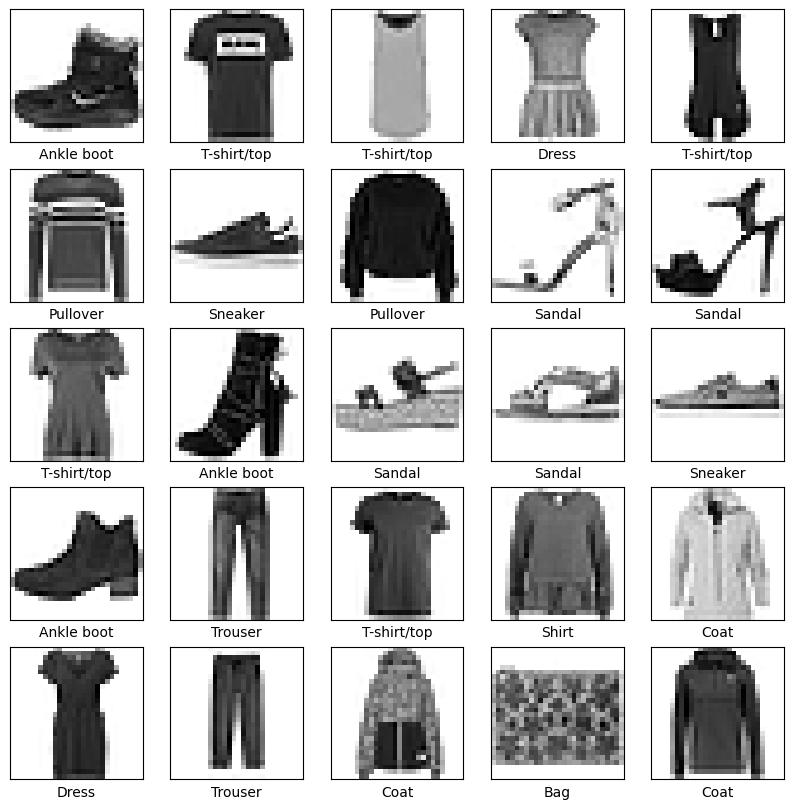

In [3]:
#Visualizando algunas imágenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i, ..., 0], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

## Paso 2: Definición de la arquitectura

Parámetros a definir:

1.   Tamaño del filtro o kernel (recuerda la salida de una convolución es un mapa de características).
2.   Selección de la capa de agrupamiento (pooling): maxpooling o average pooling. Esta capa tiene como función:
* Reducir la dimensionalidad de las capas más profundas,
* Conservar información relevante de las capas anteriores.
3. Capa de activación (relu, tanh, .....)
4. Tamaño de la capa completamente conectada (esta última capa se utiliza para hacer clasificaciones o regresiones)



In [33]:
modelo = keras.Sequential([
    # Conv 1
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),

    # Conv 2
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.25),

    # Conv 3
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),

    # Aplanar
    keras.layers.Flatten(),# Aplanado
    keras.layers.Dense(10, activation='softmax') #Capa completamente conectada
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelo.build(input_shape=train_images.shape)
modelo.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (60000, 28, 28, 128)   │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (60000, 14, 14, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (60000, 14, 14, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (60000, 14, 14, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (60000, 14, 14, 64)    │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (60000, 14, 14, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (60000, 14, 14, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (60000, 14, 14, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (60000, 14, 14, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (60000, 6272)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (60000, 10)            │        62,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,266 (610.41 KB)

 Trainable params: 156,266 (610.41 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
modelo = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),# Aplanado
    keras.layers.Dense(10, activation='softmax') #Capa completamente conectada
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
modelo.build(input_shape=train_images.shape)
modelo.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (60000, 28, 28, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (60000, 28, 28, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (60000, 28, 28, 32)    │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (60000, 28, 28, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (60000, 25088)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (60000, 10)            │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,994 (1.03 MB)

 Trainable params: 269,994 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Entrenamiento
modelo.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7978 - loss: 0.5542
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8961 - loss: 0.2862
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9117 - loss: 0.2423
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9239 - loss: 0.2089
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9289 - loss: 0.1928
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9345 - loss: 0.1782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9387 - loss: 0.1695
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9415 - loss: 0.1607
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9425 - loss: 0.1529
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9463 - loss: 0.1441


## Paso 3: evaluación del modelo

In [6]:
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nPrecisión:', test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9058 - loss: 0.4430

Precisión: 0.9057999849319458


In [35]:
test_loss, test_acc = modelo.evaluate(test_images,  test_labels, verbose=2)
print('\nPrecisión:', test_acc)

313/313 - 1s - 4ms/step - accuracy: 0.9173 - loss: 0.2481

Precisión: 0.9172999858856201


In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clases[predicted_label],
                                100*np.max(predictions_array),
                                clases[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


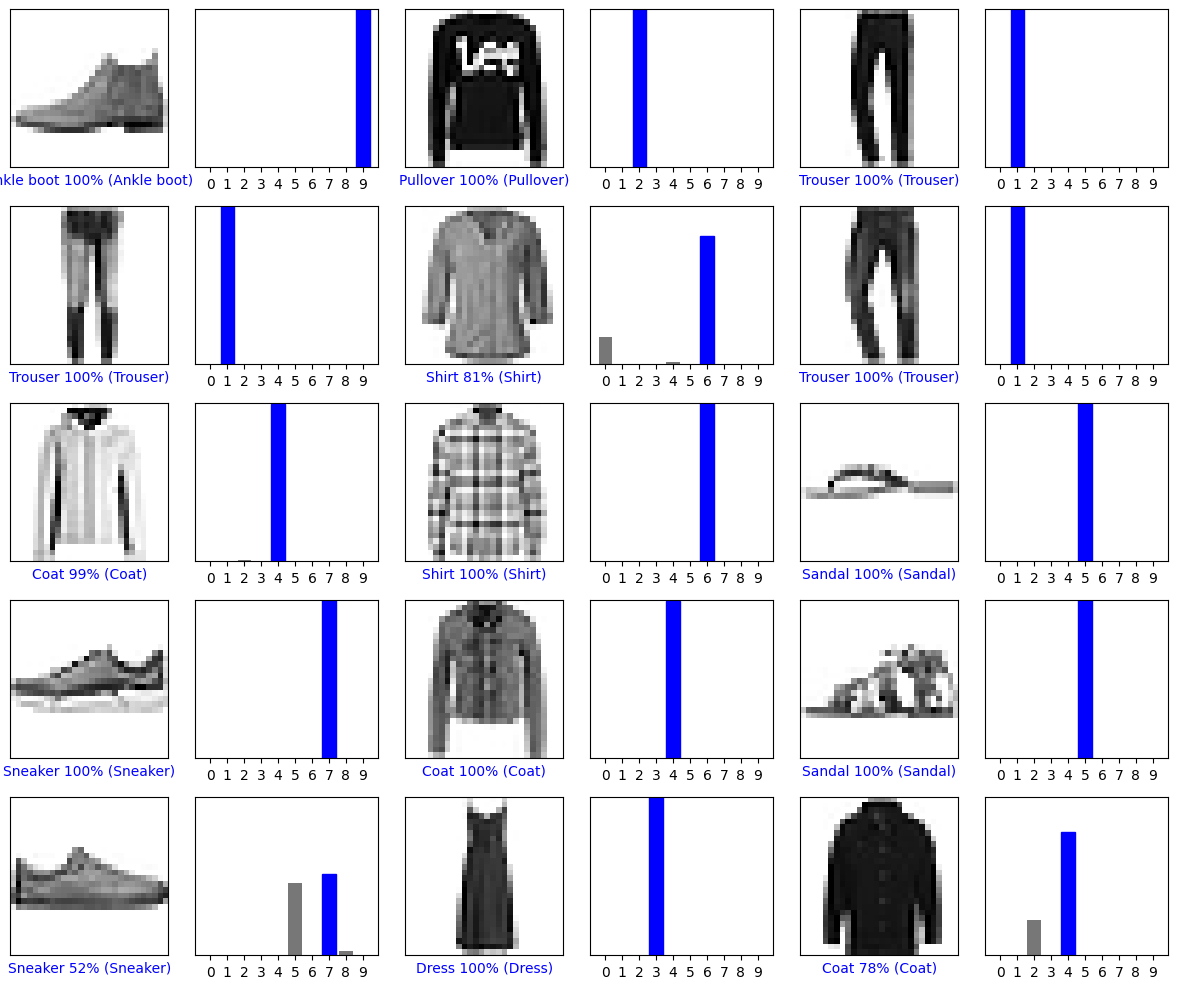

In [23]:
predictions = modelo.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images[..., 0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()